In [29]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3 MB 12 kB/s s eta 0:00:01     |███████████████████████         | 282.4 MB 33.8 MB/s eta 0:00:04     |███████████████████████▏        | 285.5 MB 33.8 MB/s eta 0:00:04     |████████████████████████████▉   | 354.8 MB 31.1 MB/s eta 0:00:02     |████████████████████████████▉   | 355.8 MB 31.1 MB/s eta 0:00:02     |█████████████████████████████   | 358.6 MB 31.1 MB/s eta 0:00:02     |█████████████████████████████▍  | 362.3 MB 9.1 MB/s eta 0:00:04     |█████████████████████████████▋  | 365.4 MB 9.1 MB/s eta 0:00:04     |██████████████████████████████  | 369.3 MB 9.1 MB/s eta 0:00:03


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import losses

In [31]:
import os 

#displaying information about image datasets
def disp_info(path):
  count=0
  for x in os.listdir(path):
    no=len(os.listdir(os.path.join(path,x)))
    print("No. of objects in",x,"is",no)
    count+=no
  return count

train_size = disp_info("../input/csc532/datasets/datasets/train")
test_size = disp_info("../input/csc532/datasets/datasets/test")
print("Training set:", train_size)
print("Training set:", test_size)

No. of objects in negative is 551
No. of objects in positive is 125
No. of objects in negative is 290
No. of objects in positive is 118
Training set: 676
Training set: 408


In [32]:
#Now using generator to scale images in range of 0 to 1
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [38]:
#Some hyperparameters for preprocessing and model training preparation
batch_size = 128
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [34]:
train_path="../input/csc532/datasets/datasets/train"
test_path="../input/csc532/datasets/datasets/test"

#Importing images dataset from test/train folders
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_path,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
test_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_path,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 676 images belonging to 2 classes.
Found 676 images belonging to 2 classes.


In [39]:
#Now creating CNN sequential model for training our data
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(2, activation='sigmoid')
])

In [40]:
#Compiling the model
model.compile(optimizer='adam',
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Model summary 
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 20736)            

In [41]:
#Now we finally train the model
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = train_size // batch_size,
    epochs = epochs,
    validation_data = test_data_gen,
    validation_steps = test_size // batch_size
)

Epoch 1/10
5/5 [==============================] - 28s 6s/step - loss: 1.4415 - accuracy: 0.6945 - val_loss: 0.5871 - val_accuracy: 0.8099
Epoch 2/10
5/5 [==============================] - 23s 5s/step - loss: 0.5346 - accuracy: 0.7953 - val_loss: 0.3918 - val_accuracy: 0.8411
Epoch 3/10
5/5 [==============================] - 23s 5s/step - loss: 0.4285 - accuracy: 0.8090 - val_loss: 0.3538 - val_accuracy: 0.8125
Epoch 4/10
5/5 [==============================] - 23s 5s/step - loss: 0.3133 - accuracy: 0.8591 - val_loss: 0.2320 - val_accuracy: 0.9531
Epoch 5/10
5/5 [==============================] - 24s 5s/step - loss: 0.2050 - accuracy: 0.9447 - val_loss: 0.1689 - val_accuracy: 0.9271
Epoch 6/10
5/5 [==============================] - 23s 5s/step - loss: 0.1347 - accuracy: 0.9465 - val_loss: 0.1180 - val_accuracy: 0.9557
Epoch 7/10
5/5 [==============================] - 24s 5s/step - loss: 0.0990 - accuracy: 0.9687 - val_loss: 0.0889 - val_accuracy: 0.9740
Epoch 8/10
5/5 [==================

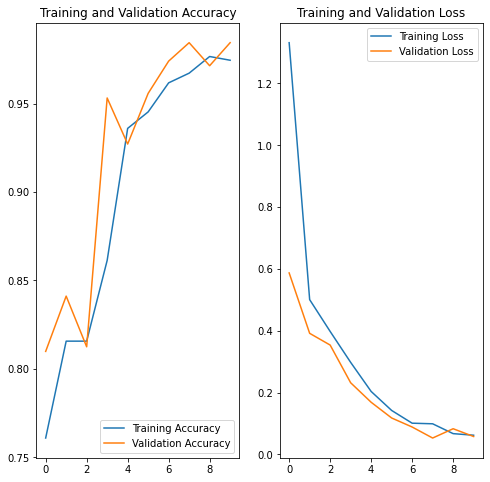

In [42]:
import matplotlib.pyplot as plt

#Visualize model training parameters 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [65]:
import cv2

#Importing data to perform predictions on our model
prediction_dataset=[]
predict_path="../input/csc532/DLAI3_CXR_Validation_Set"
for file in os.listdir(predict_path):
    #Reading image from file path using openCV
    file_path=predict_path+"/"+file
    img=cv2.imread(file_path)
    #Resizing image
    trans=cv2.resize(img,(IMG_HEIGHT,IMG_WIDTH))
    trans=trans/255.0
    prediction_dataset.append(trans)

In [68]:
#Converting dataset to numpy array
import numpy as np
prediction_dataset=np.array(prediction_dataset)

In [80]:
#Performing predictions and storing it
predictions=np.argmax(model.predict(prediction_dataset),axis=1)

In [82]:
import pandas as pd

#Exporting results of prediction into .csv file
df=pd.DataFrame({"filename":pd.Series(os.listdir(predict_path)),"label":pd.Series(predictions)})
df.to_csv("submit.csv",index=False)                